ASSIGNMENT 1

1) Conduct the business background investigation of the firm by answering (1) what the firm does (2) what are the major business lines the firm has, (3) which business line is the firm's profit engine. (4) what is the business outlook of the firm.  

2) Visualize the stock price history (open, close, high, low, volume) from Jan 1, 2020 to December 31, 2024. 

3) Find 3 to 5 competitors' stocks and visualize the stock price history from Jan 1, 2020 to December 31, 2024.

4) Take the Close of your stock, calculate its mean, variance, skewness and kurtosis, and plot the nonparametric kernel density of the Adjusted Close.

5) Take "Close" column as your target and replicate (1) the mixture modeling technique to approximate the empirical distribution using normal distributions as component distribution, (2) bootstrap analysis to find the 95% confidence interval of the mean estimates (3) Monte-Carlo analysis to simulate 1000 paths using five key parameters that mimic the empirical distribution of your stock.    

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import scipy.stats as ss
import yfinance as yf
import matplotlib.dates as mdates

start_date = datetime(2020,1,1)
end_date = datetime(2024,12,31)

In [3]:
tesla = yf.download('TSLA',start= start_date, end = end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, TSLA)   1257 non-null   float64
 1   (High, TSLA)    1257 non-null   float64
 2   (Low, TSLA)     1257 non-null   float64
 3   (Open, TSLA)    1257 non-null   float64
 4   (Volume, TSLA)  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [12]:
print(tesla.head())

Price           Close       High        Low       Open     Volume  MA60  MA120
Date                                                                          
2020-01-02  28.684000  28.713333  28.114000  28.299999  142981500   NaN    NaN
2020-01-03  29.534000  30.266666  29.128000  29.366667  266677500   NaN    NaN
2020-01-06  30.102667  30.104000  29.333332  29.364668  151995000   NaN    NaN
2020-01-07  31.270666  31.441999  30.224001  30.760000  268231500   NaN    NaN
2020-01-08  32.809334  33.232666  31.215334  31.580000  467164500   NaN    NaN


2) Visualize the stock price history (open, close, high, low, volume) from Jan 1, 2020 to December 31, 2024. 

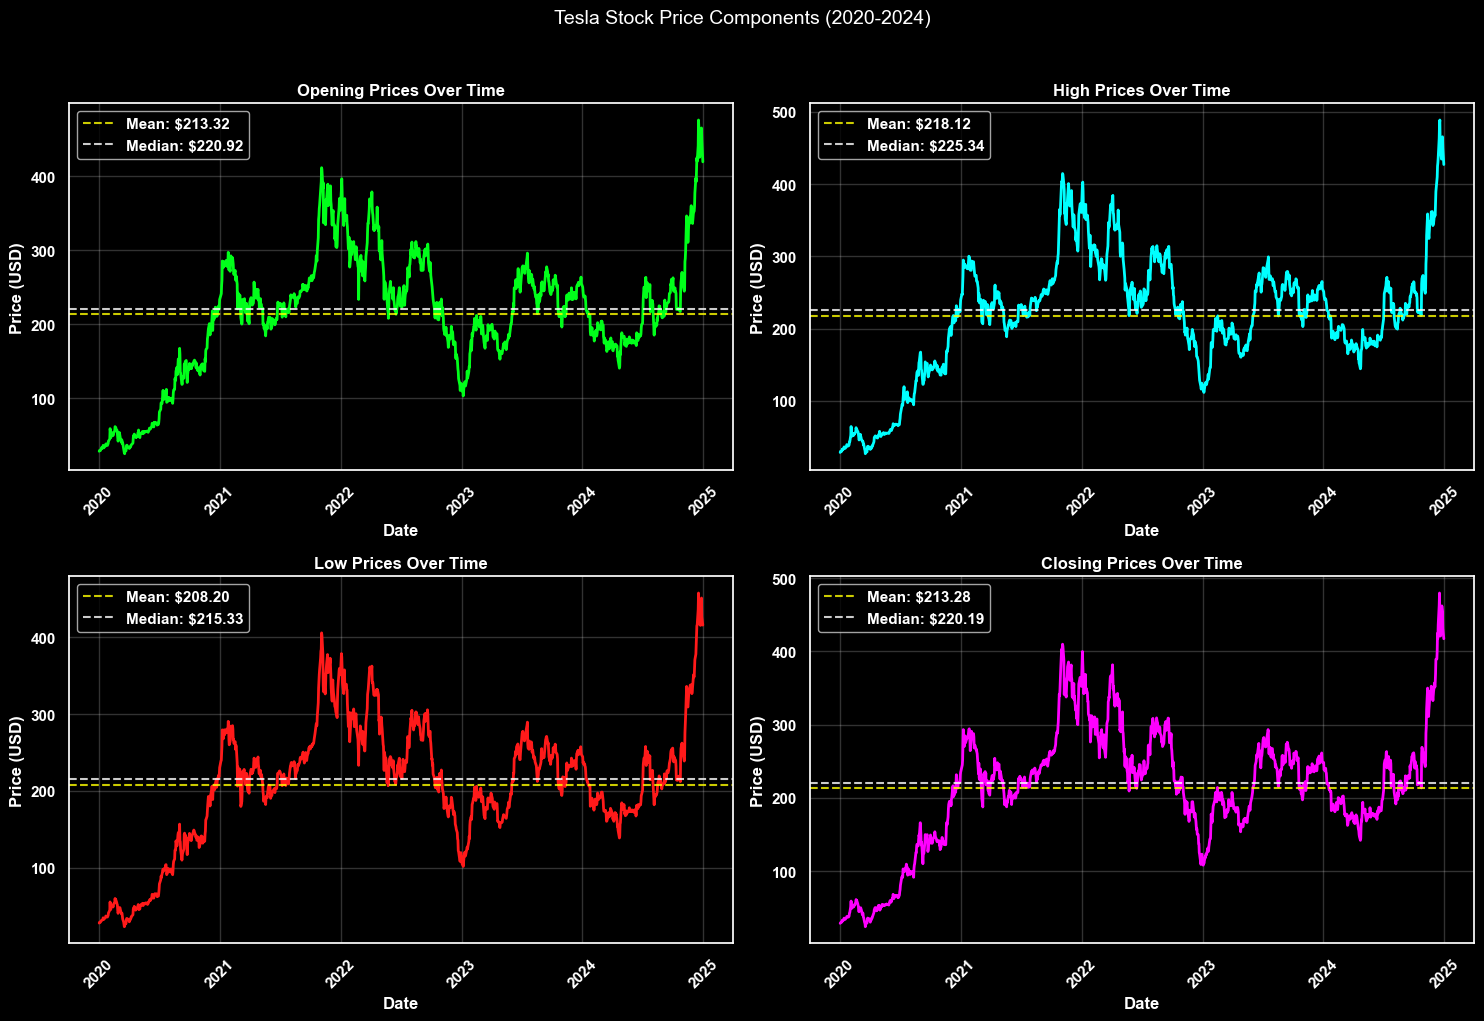

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup dark theme
plt.style.use('dark_background')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Colors
colors = {
    'Open': '#00ff1a',    # Bright green
    'High': '#00ffff',    # Cyan
    'Low': '#ff1a1a',     # Bright red
    'Close': '#ff00ff'    # Magenta
}

# Calculate statistics - convert to float
open_mean = float(tesla['Open'].mean())
open_median = float(tesla['Open'].median())
high_mean = float(tesla['High'].mean())
high_median = float(tesla['High'].median())
low_mean = float(tesla['Low'].mean())
low_median = float(tesla['Low'].median())
close_mean = float(tesla['Close'].mean())
close_median = float(tesla['Close'].median())

# Open Price Over Time
ax1.plot(tesla.index, tesla['Open'], color=colors['Open'], linewidth=2)
ax1.axhline(y=open_mean, color='yellow', linestyle='--', alpha=0.8, label=f'Mean: ${open_mean:.2f}')
ax1.axhline(y=open_median, color='white', linestyle='--', alpha=0.8, label=f'Median: ${open_median:.2f}')
ax1.set_title('Opening Prices Over Time', fontsize=12, color='white')
ax1.legend(loc='upper left')

# High Price Over Time
ax2.plot(tesla.index, tesla['High'], color=colors['High'], linewidth=2)
ax2.axhline(y=high_mean, color='yellow', linestyle='--', alpha=0.8, label=f'Mean: ${high_mean:.2f}')
ax2.axhline(y=high_median, color='white', linestyle='--', alpha=0.8, label=f'Median: ${high_median:.2f}')
ax2.set_title('High Prices Over Time', fontsize=12, color='white')
ax2.legend(loc='upper left')

# Low Price Over Time
ax3.plot(tesla.index, tesla['Low'], color=colors['Low'], linewidth=2)
ax3.axhline(y=low_mean, color='yellow', linestyle='--', alpha=0.8, label=f'Mean: ${low_mean:.2f}')
ax3.axhline(y=low_median, color='white', linestyle='--', alpha=0.8, label=f'Median: ${low_median:.2f}')
ax3.set_title('Low Prices Over Time', fontsize=12, color='white')
ax3.legend(loc='upper left')

# Close Price Over Time
ax4.plot(tesla.index, tesla['Close'], color=colors['Close'], linewidth=2)
ax4.axhline(y=close_mean, color='yellow', linestyle='--', alpha=0.8, label=f'Mean: ${close_mean:.2f}')
ax4.axhline(y=close_median, color='white', linestyle='--', alpha=0.8, label=f'Median: ${close_median:.2f}')
ax4.set_title('Closing Prices Over Time', fontsize=12, color='white')
ax4.legend(loc='upper left')

# Enhance visibility
for ax in [ax1, ax2, ax3, ax4]:
    ax.grid(True, alpha=0.2)
    ax.set_xlabel('Date', color='white')
    ax.set_ylabel('Price (USD)', color='white')
    ax.tick_params(colors='white')
    ax.tick_params(axis='x', rotation=45)

# Main title and layout
plt.suptitle('Tesla Stock Price Components (2020-2024)', 
             fontsize=14, y=1.02, color='white')
plt.tight_layout()
plt.show()

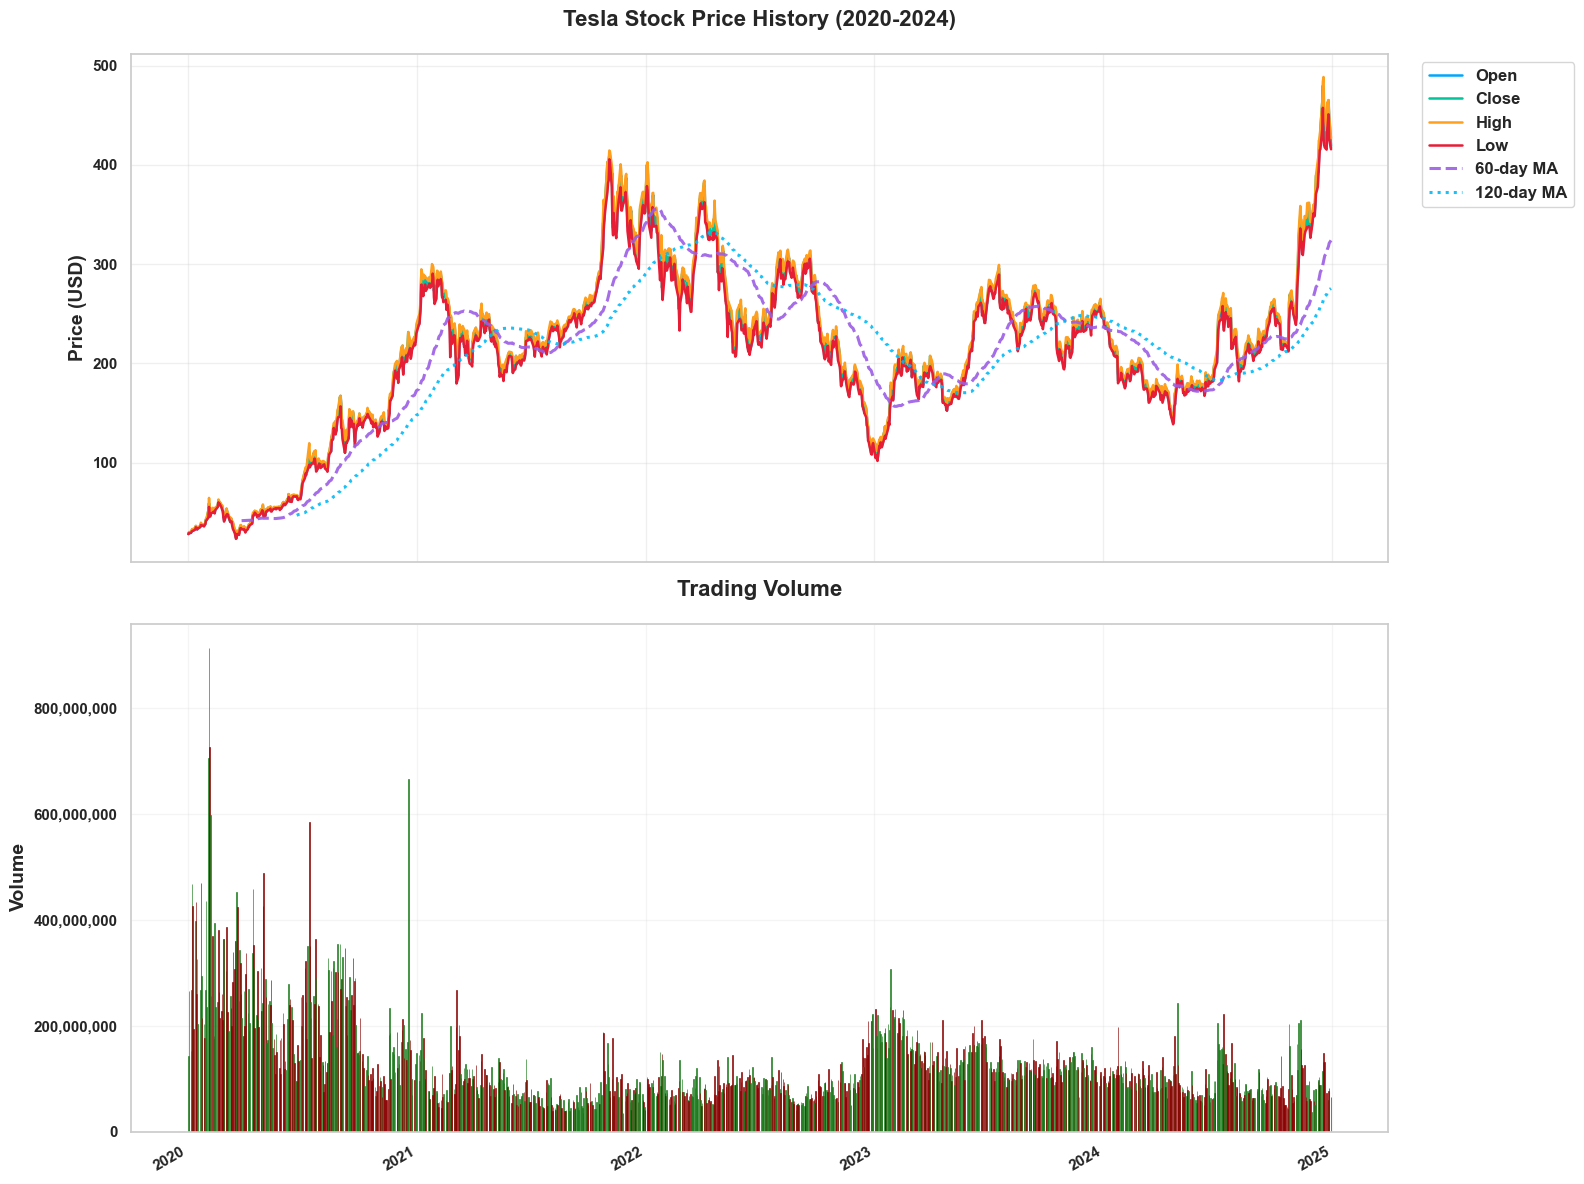

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Fix multi-index columns
tesla.columns = tesla.columns.get_level_values(0)

# Calculate moving averages
#tesla['MA20'] = tesla['Close'].rolling(window=20).mean()
tesla['MA60'] = tesla['Close'].rolling(window=60).mean()
tesla['MA120'] = tesla['Close'].rolling(window=120).mean()


# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# Price plot
ax1.plot(tesla.index, tesla['Open'], label='Open', linewidth=1.8, color='#00A6FB')  # Bright blue
ax1.plot(tesla.index, tesla['Close'], label='Close', linewidth=1.8, color='#02C39A')  # Vivid green
ax1.plot(tesla.index, tesla['High'], label='High', linewidth=1.8, color='#FF9F1C')  # Strong orange
ax1.plot(tesla.index, tesla['Low'], label='Low', linewidth=1.8, color='#E71D36')  # Deep red
ax1.plot(tesla.index, tesla['MA60'], label='60-day MA', linewidth=2.2, color='#9B5DE5', linestyle='--', alpha=0.9)  # Rich purple
ax1.plot(tesla.index, tesla['MA120'], label='120-day MA', linewidth=2.2, color='#00BBF9', linestyle=':', alpha=0.9)  # Bold teal

# Price plot styling
ax1.set_title('Tesla Stock Price History (2020-2024)', fontsize=16, pad=20)
ax1.set_ylabel('Price (USD)', fontsize=14)
ax1.legend(loc='upper left', frameon=True, fontsize=12, bbox_to_anchor=(1.02, 1))
ax1.grid(True, alpha=0.3)
ax1.fill_between(tesla.index, tesla['Low'], tesla['High'], alpha=0.1, color='gray')

# Volume plot
colors = np.where(tesla['Close'] >= tesla['Open'], '#1b7a1b', '#8b0000')  # Darker green and red
ax2.bar(tesla.index, 
        tesla['Volume'], 
        color=colors, 
        alpha=0.9,          # Increased opacity
        width=1,
        edgecolor=colors,   # Adding edge color
        linewidth=0.5)      # Edge width

ax2.set_title('Trading Volume', fontsize=16, pad=20)
ax2.set_ylabel('Volume', fontsize=14)
ax2.grid(True, alpha=0.2)  # Reduced grid opacity
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Date formatting
ax2.xaxis.set_major_locator(mdates.YearLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
fig.autofmt_xdate()

# Layout
plt.tight_layout()
plt.show()

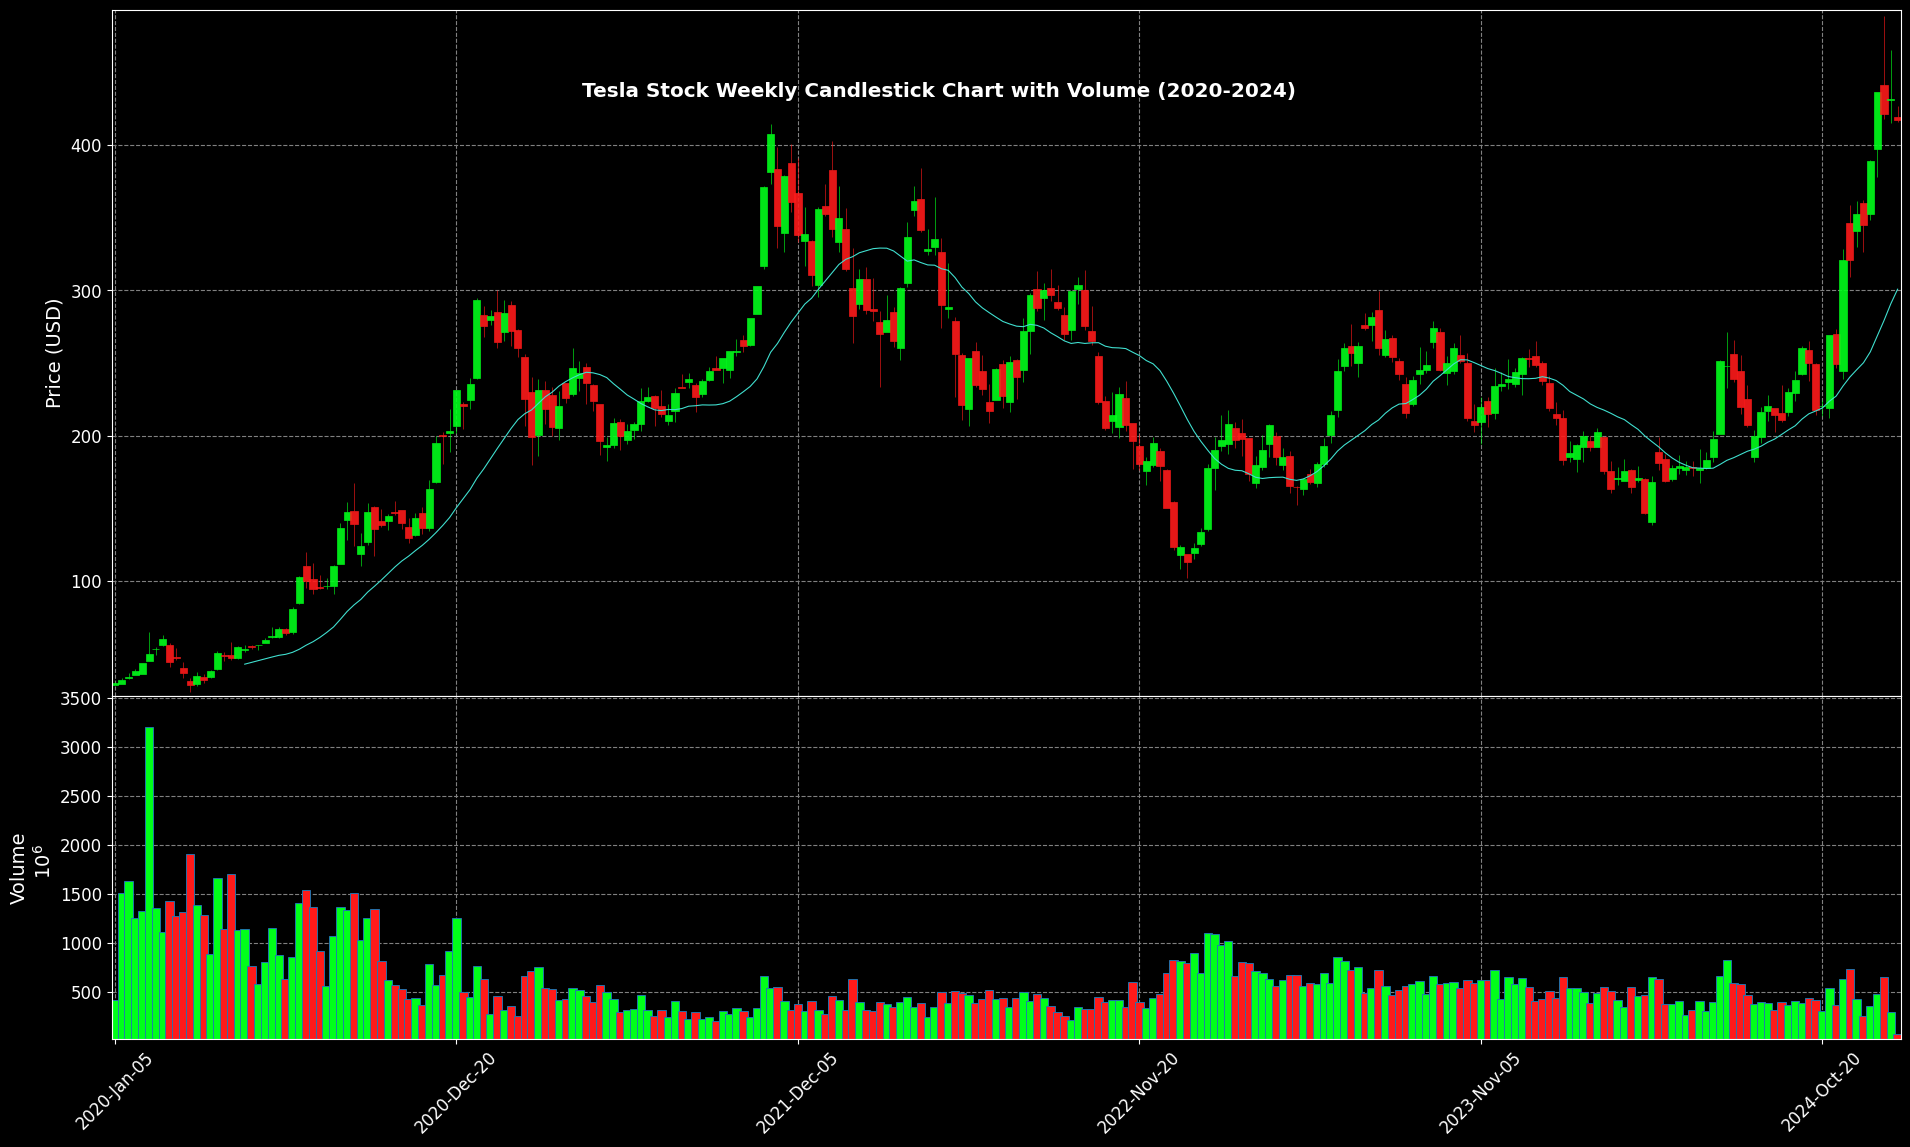

In [15]:
import mplfinance as mpf
import pandas as pd

# Resample to weekly data
weekly_data = tesla.resample('W').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
})

# Enhanced dark theme style
mc = mpf.make_marketcolors(
    up='#00ff1a',      # Bright green
    down='#ff1a1a',    # Bright red
    edge='inherit',
    wick='inherit',
    volume='in',
    ohlc='inherit'
)

s = mpf.make_mpf_style(
    base_mpf_style='nightclouds',
    marketcolors=mc,
    gridstyle='--',
    y_on_right=False,
    facecolor='black',
    edgecolor='white',
    figcolor='black',
    gridcolor='gray',
    rc={
        'figure.facecolor': 'black',
        'axes.facecolor': 'black',
        'axes.edgecolor': 'white',
        'axes.labelcolor': 'white',
        'axes.titlecolor': 'white',
        'xtick.color': 'white',
        'ytick.color': 'white',
        'text.color': 'white',
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12
    }
)

# Create enhanced plot
mpf.plot(
    weekly_data,
    type='candle',
    style=s,
    figsize=(20, 12),
    volume=True,
    mav=(20),
    title='\nTesla Stock Weekly Candlestick Chart with Volume (2020-2024)',
    ylabel='Price (USD)',
    ylabel_lower='Volume',
    panel_ratios=(2,1),    # Adjusted ratio for better volume visibility
    scale_width_adjustment=dict(candle=2.5, lines=1.0, volume=1.5),
    scale_padding=dict(left=0.8, right=0.8, top=1.2, bottom=1.0),
    tight_layout=True
)

3) Find 3 to 5 competitors' stocks and visualize the stock price history from Jan 1, 2020 to December 31, 2024.

[*********************100%***********************]  4 of 4 completed


Price           Close                            High                       \
Ticker            BYD LCID RIVN       TSLA        BYD LCID RIVN       TSLA   
Date                                                                         
2020-01-02  29.101925  NaN  NaN  28.684000  29.285931  NaN  NaN  28.713333   
2020-01-03  28.743597  NaN  NaN  29.534000  28.840442  NaN  NaN  30.266666   
2020-01-06  28.792019  NaN  NaN  30.102667  28.976025  NaN  NaN  30.104000   
2020-01-07  28.598333  NaN  NaN  31.270666  28.782338  NaN  NaN  31.441999   
2020-01-08  28.850126  NaN  NaN  32.809334  29.063185  NaN  NaN  33.232666   

Price             Low                            Open                       \
Ticker            BYD LCID RIVN       TSLA        BYD LCID RIVN       TSLA   
Date                                                                         
2020-01-02  28.675808  NaN  NaN  28.114000  29.266561  NaN  NaN  28.299999   
2020-01-03  28.443378  NaN  NaN  29.128000  28.695173  NaN  NaN

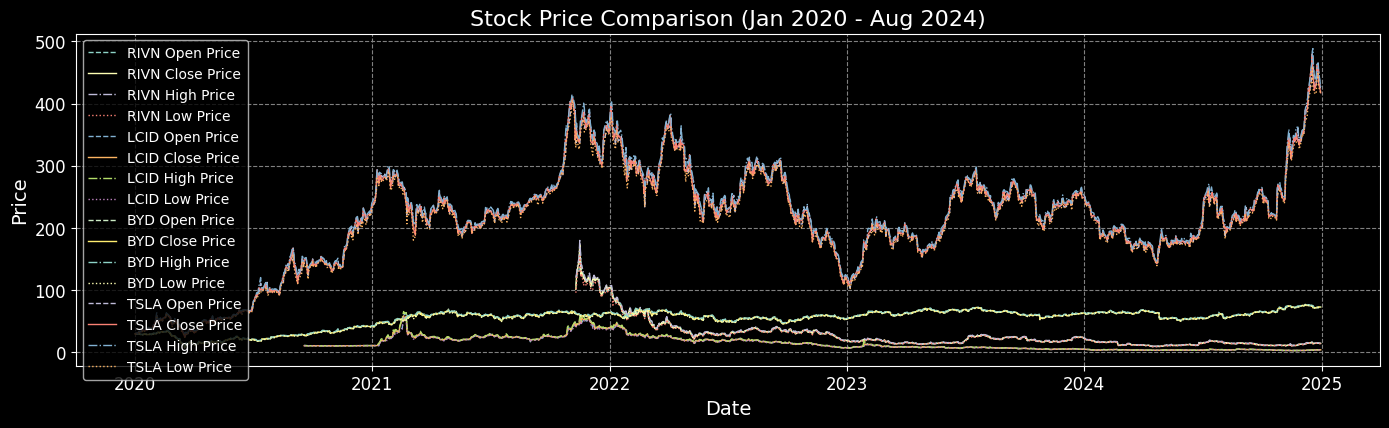

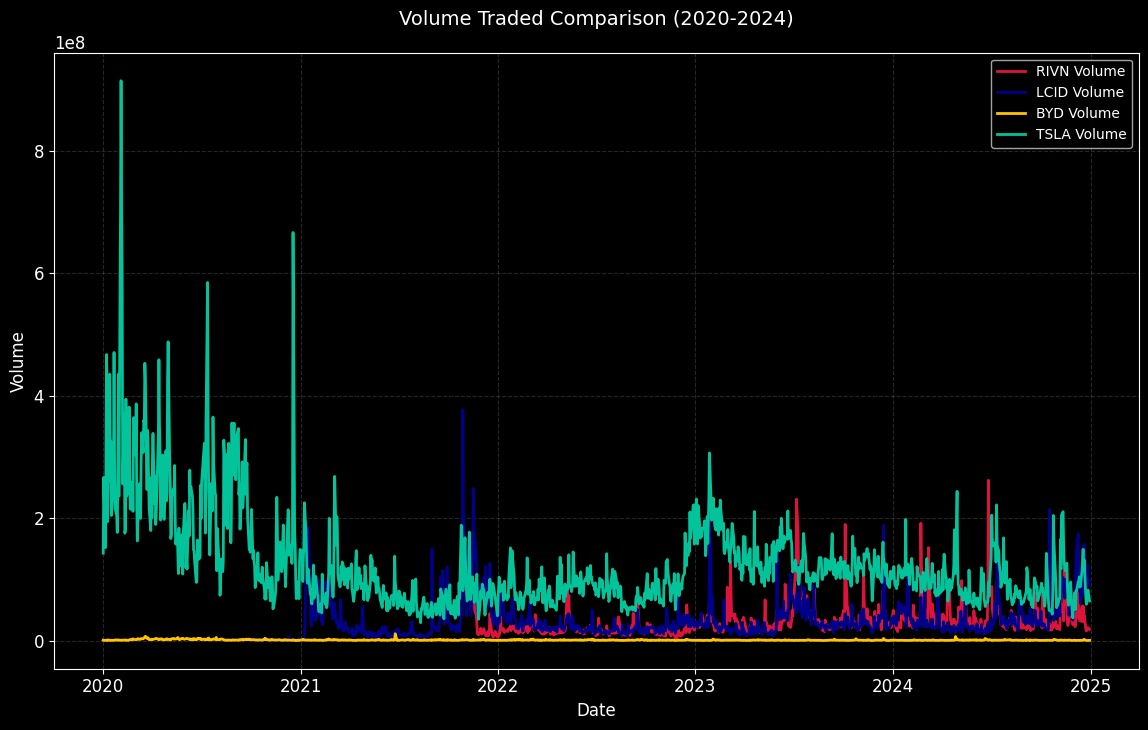

In [16]:
tickers = ['RIVN', 'LCID', 'BYD','TSLA' ]

#download the stock data from yfinance:
data = yf.download(tickers, start = start_date, end = end_date )
print(data.head())

# Visualize Open, Close, High, Low prices for all tickers
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)# Loop through each ticker and plot Open, Close, High, and Low prices
for ticker in tickers:
    plt.plot(data['Open'][ticker], label=f'{ticker} Open Price', linestyle='--')
    plt.plot(data['Close'][ticker], label=f'{ticker} Close Price')
    plt.plot(data['High'][ticker], label=f'{ticker} High Price', linestyle='-.')
    plt.plot(data['Low'][ticker], label=f'{ticker} Low Price', linestyle=':')

plt.title('Stock Price Comparison (Jan 2020 - Aug 2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


# Visualize Volume traded for all tickers
plt.figure(figsize=(14, 8))


# Custom color scheme
colors = {
    'RIVN': '#DC143C',  # Bright Orange
    'LCID': '#00008B',   # Bright Blue
    'BYD': '#FFC300',   # Bright Green
    'TSLA': '#02C39A'   # Bright Red
}

# Plot volumes
for ticker in tickers:
    plt.plot(data['Volume'][ticker], 
             label=f'{ticker} Volume', 
             color=colors[ticker],
             linewidth=2)

# Format volume plot
plt.title('Volume Traded Comparison (2020-2024)', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)
plt.show()

[*********************100%***********************]  1 of 1 completed


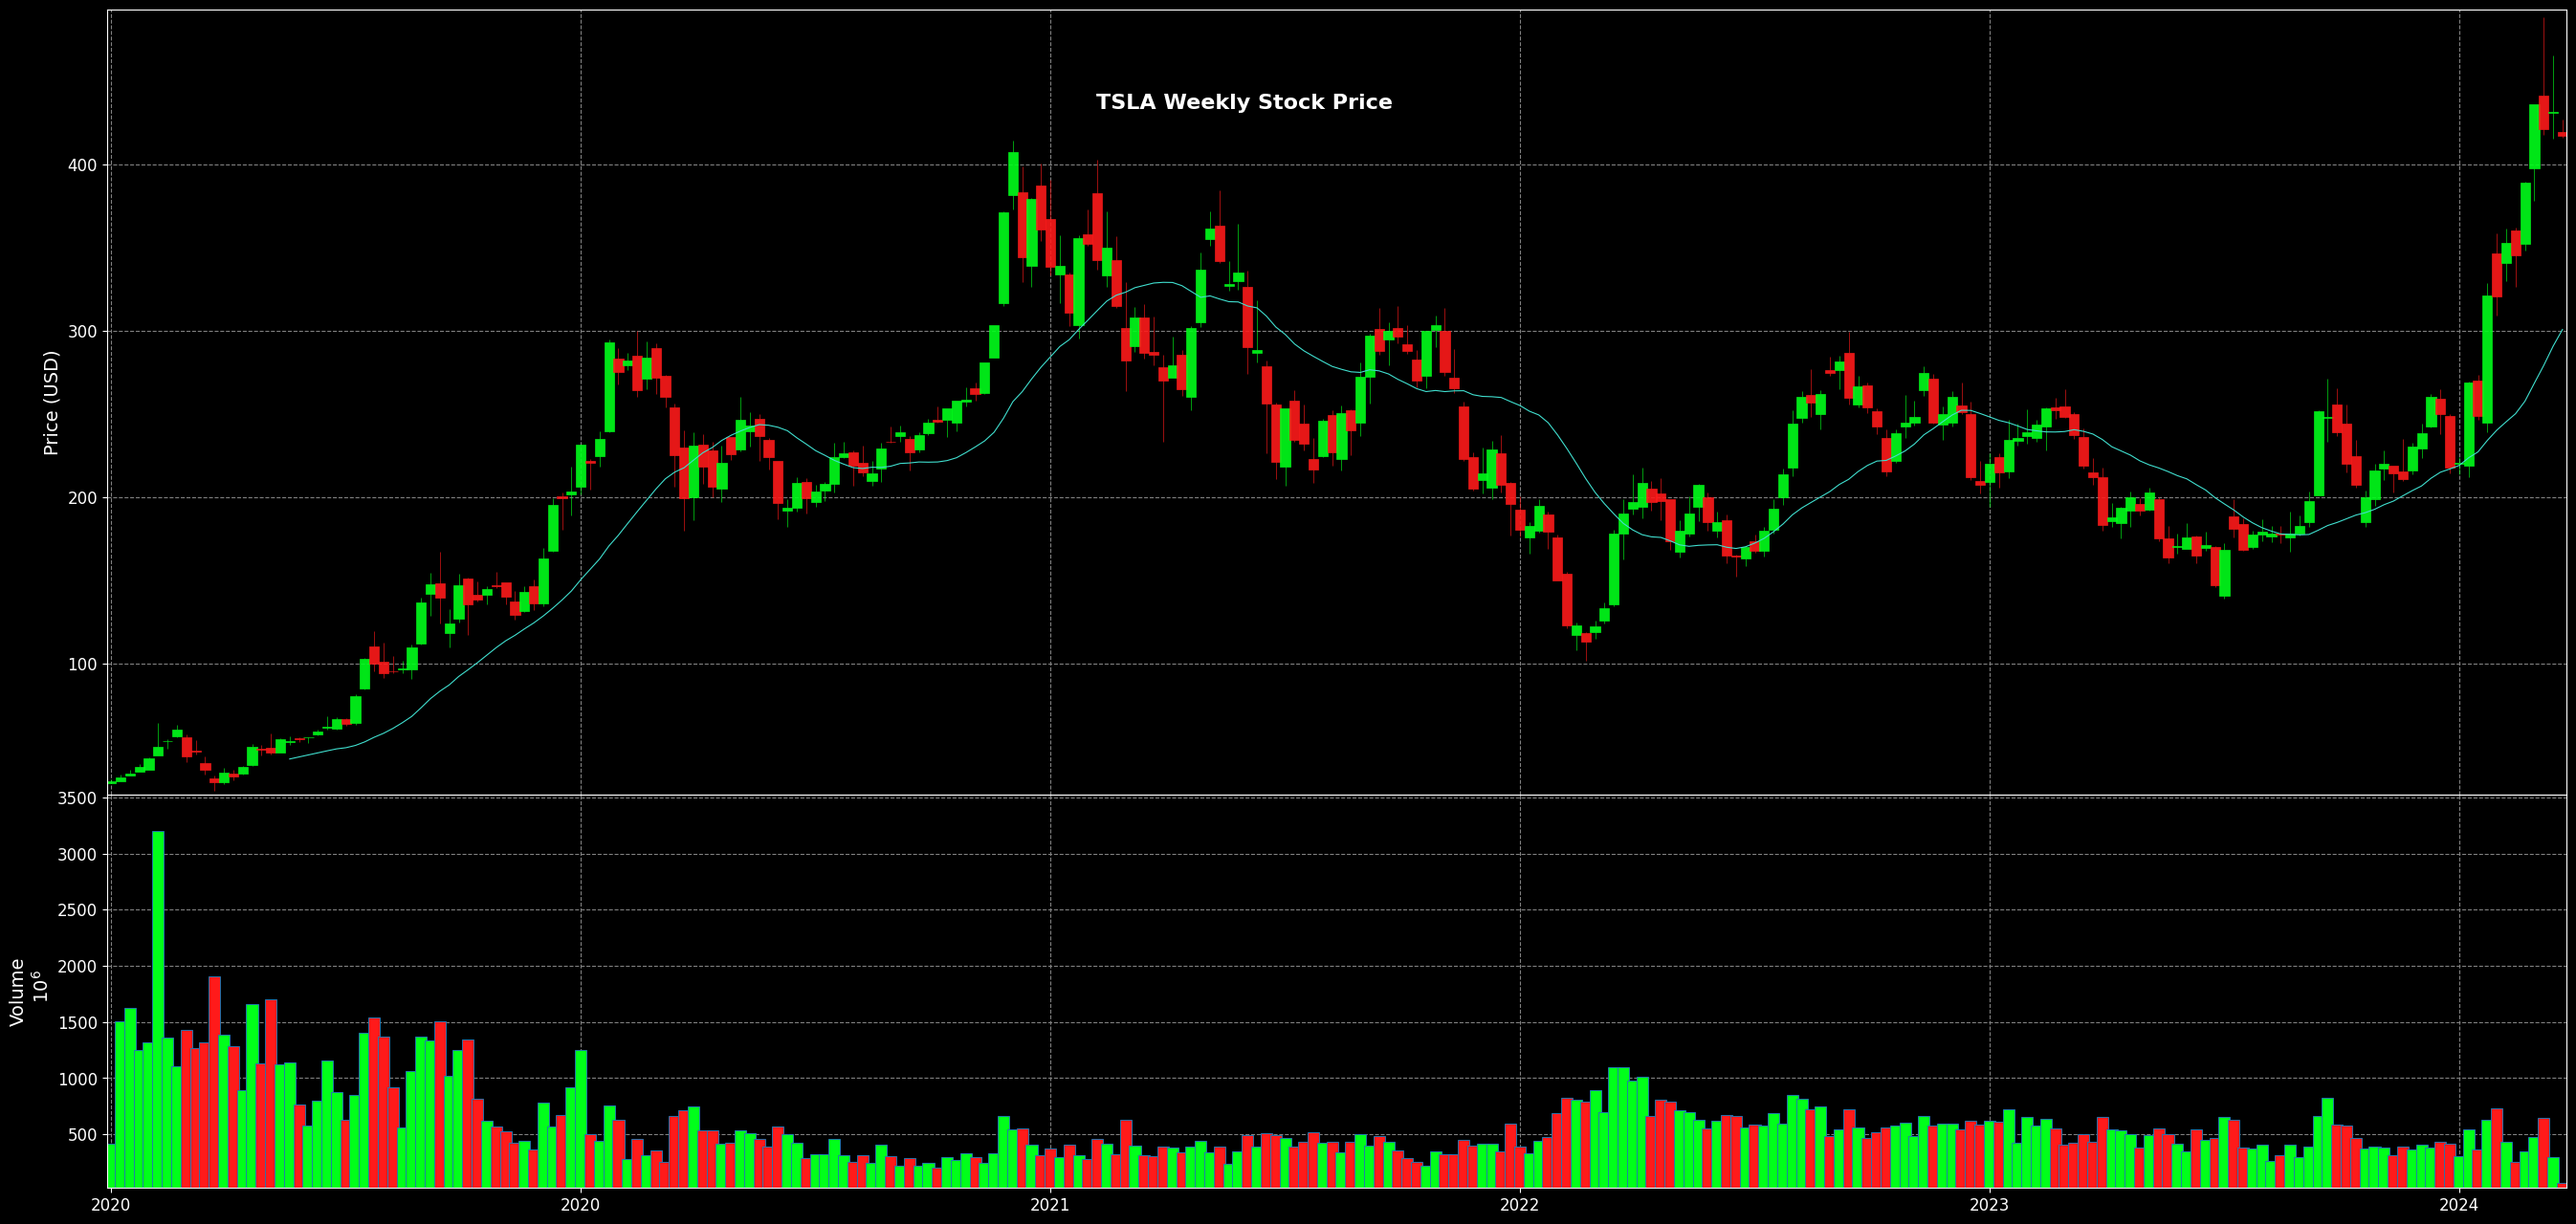

[*********************100%***********************]  1 of 1 completed


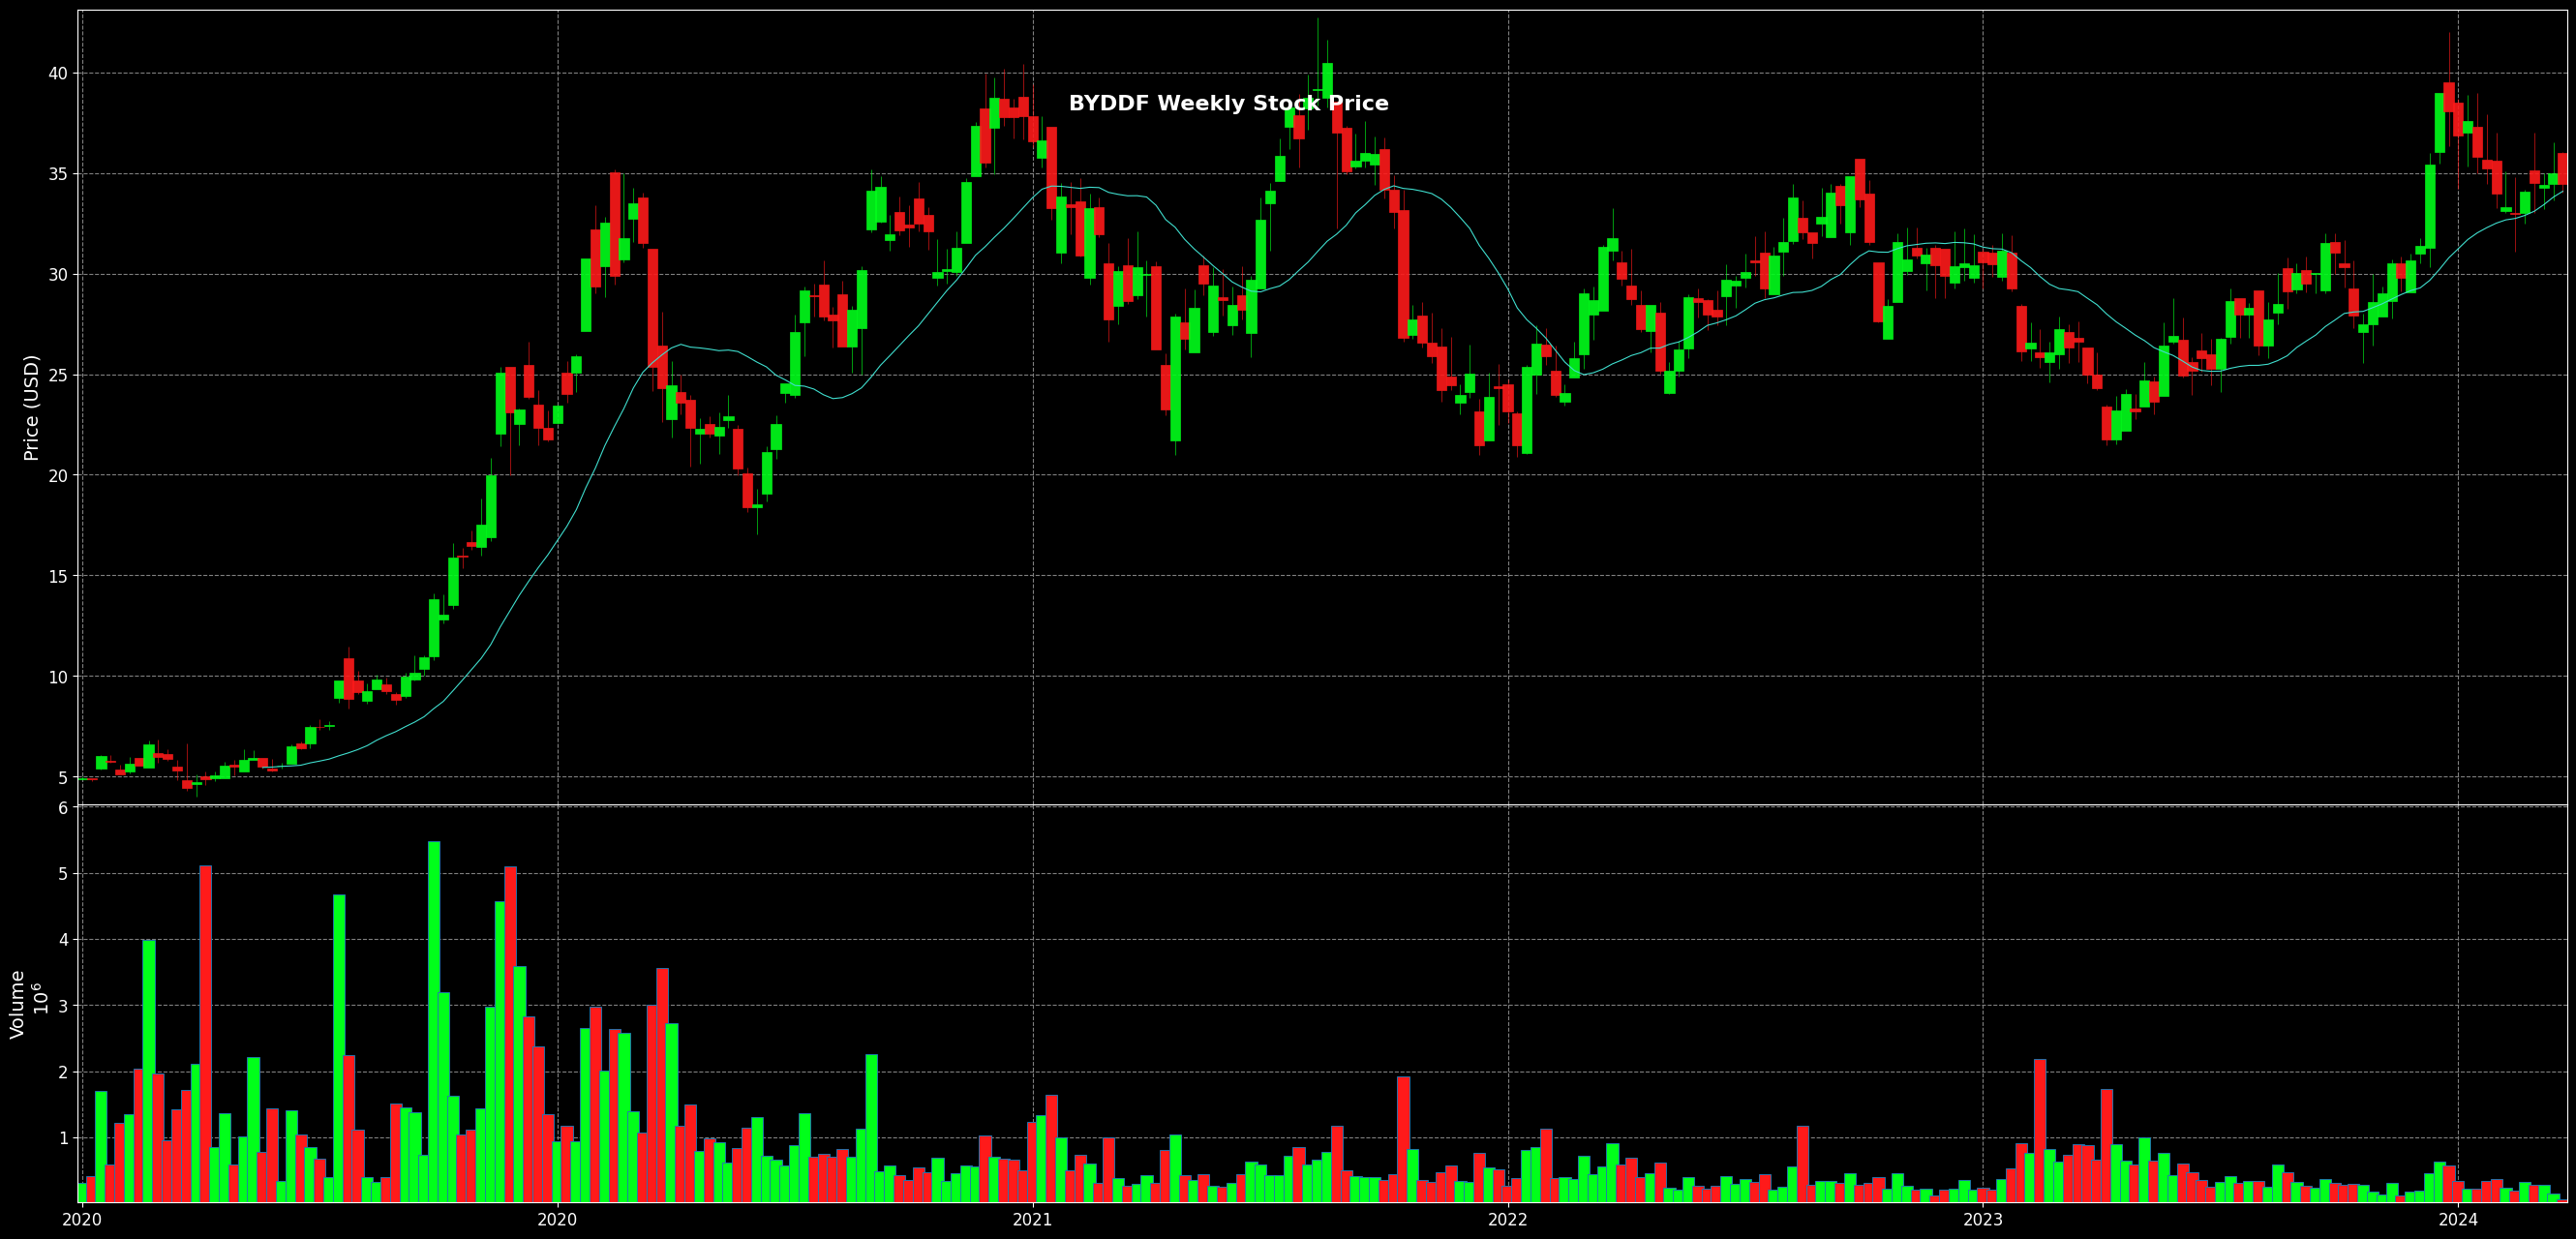

[*********************100%***********************]  1 of 1 completed


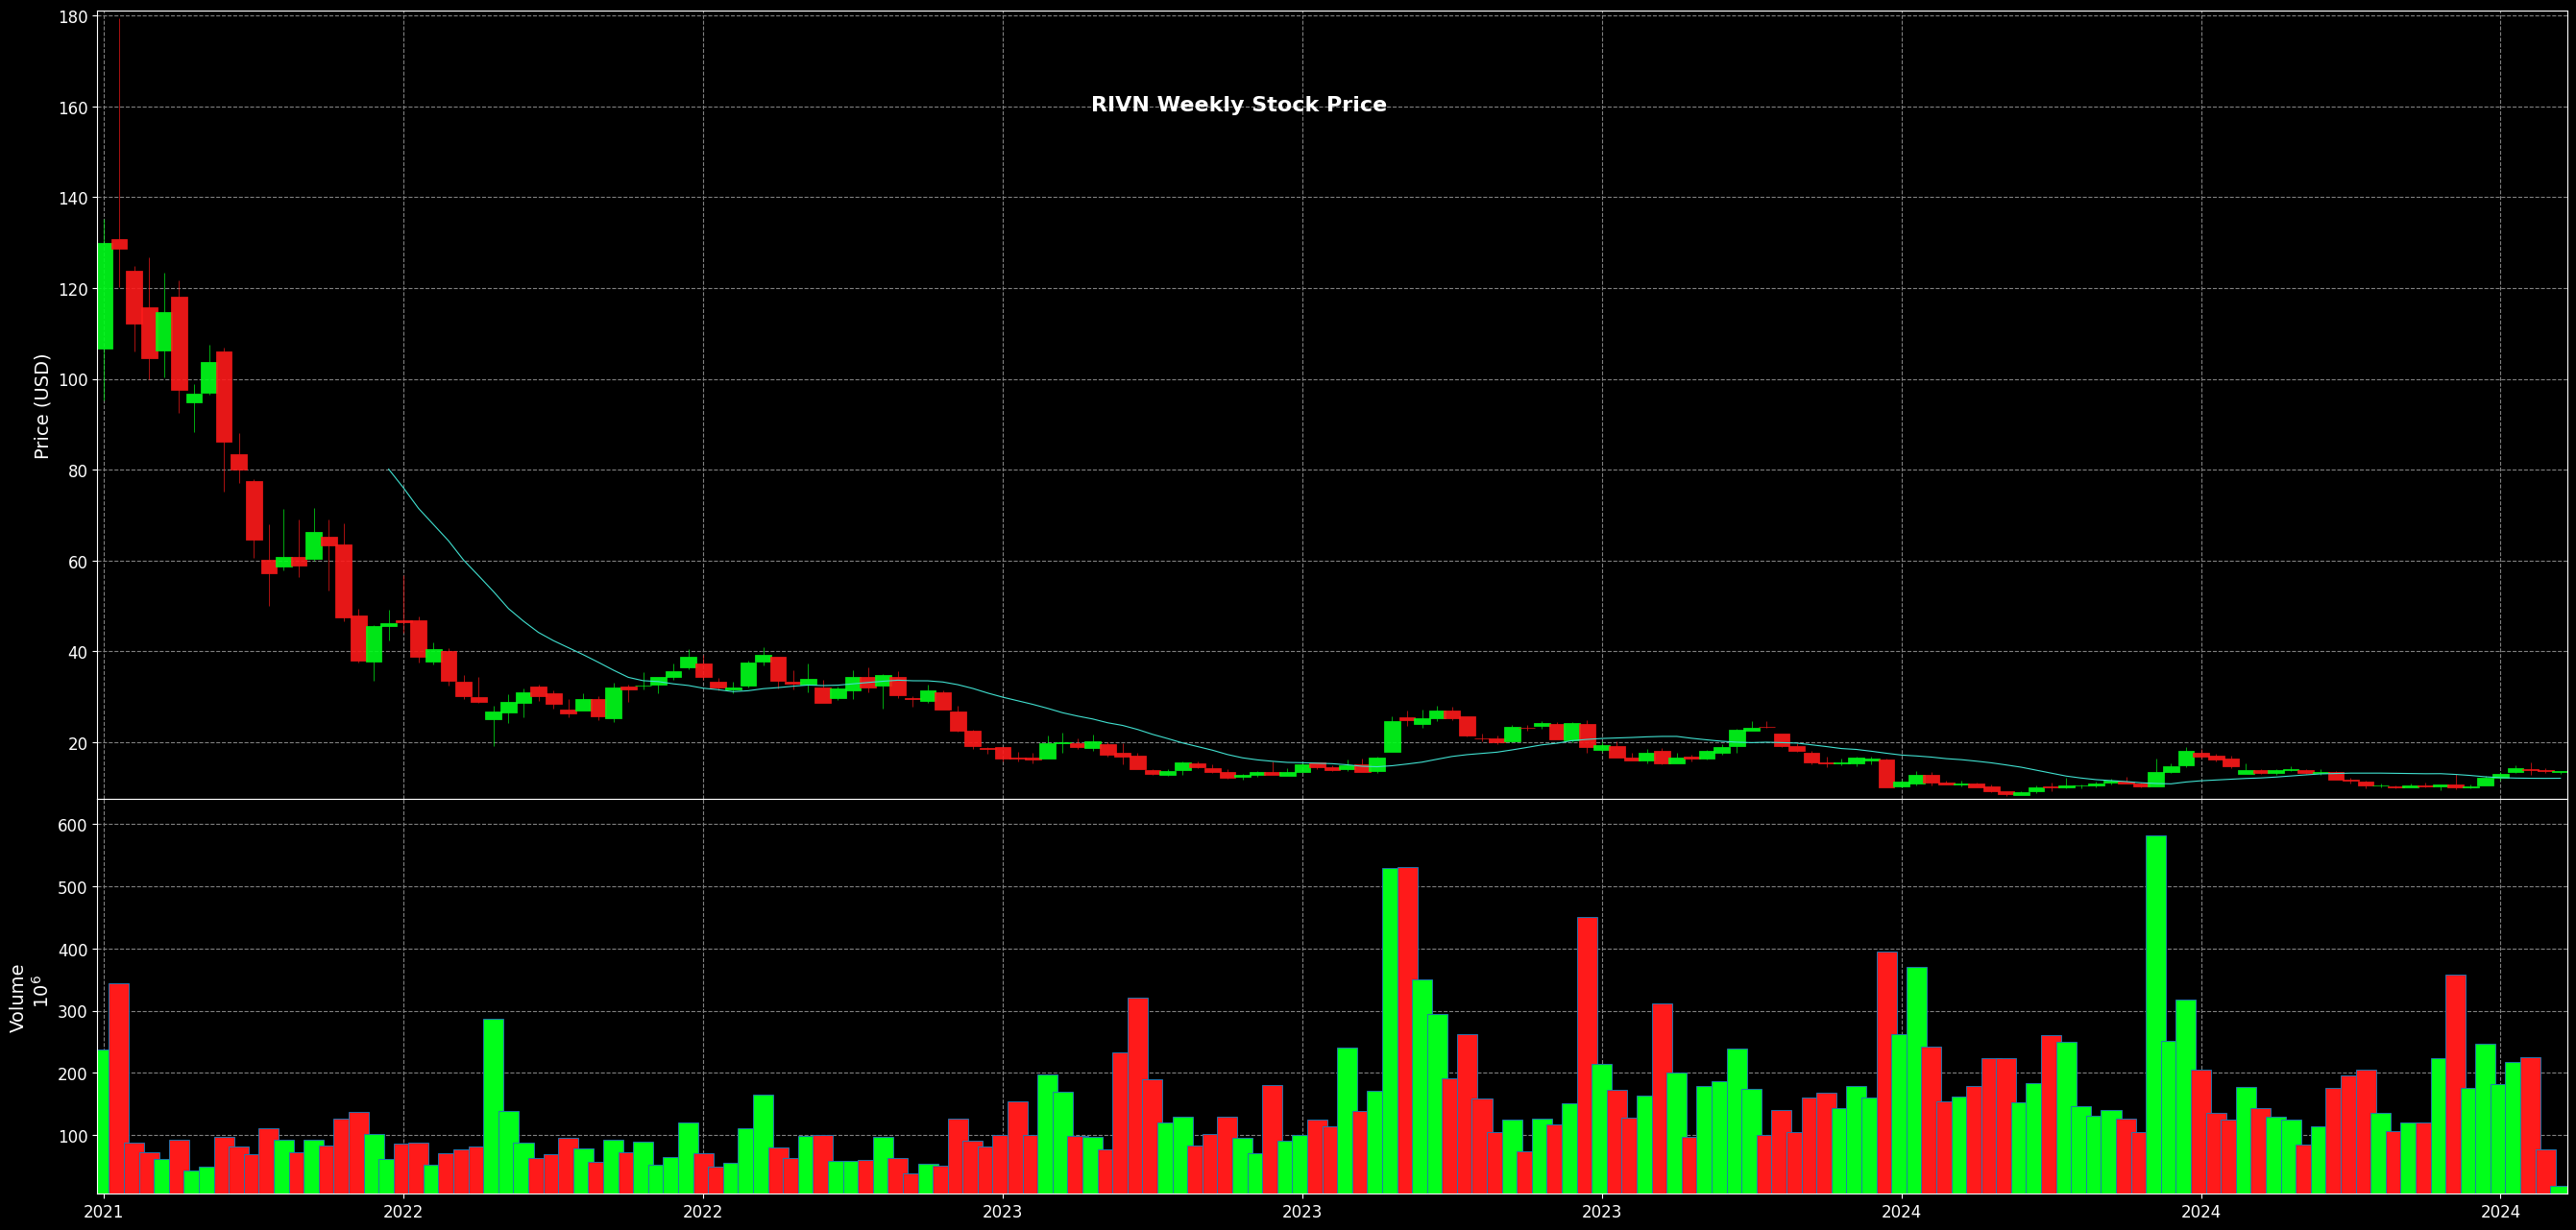

[*********************100%***********************]  1 of 1 completed


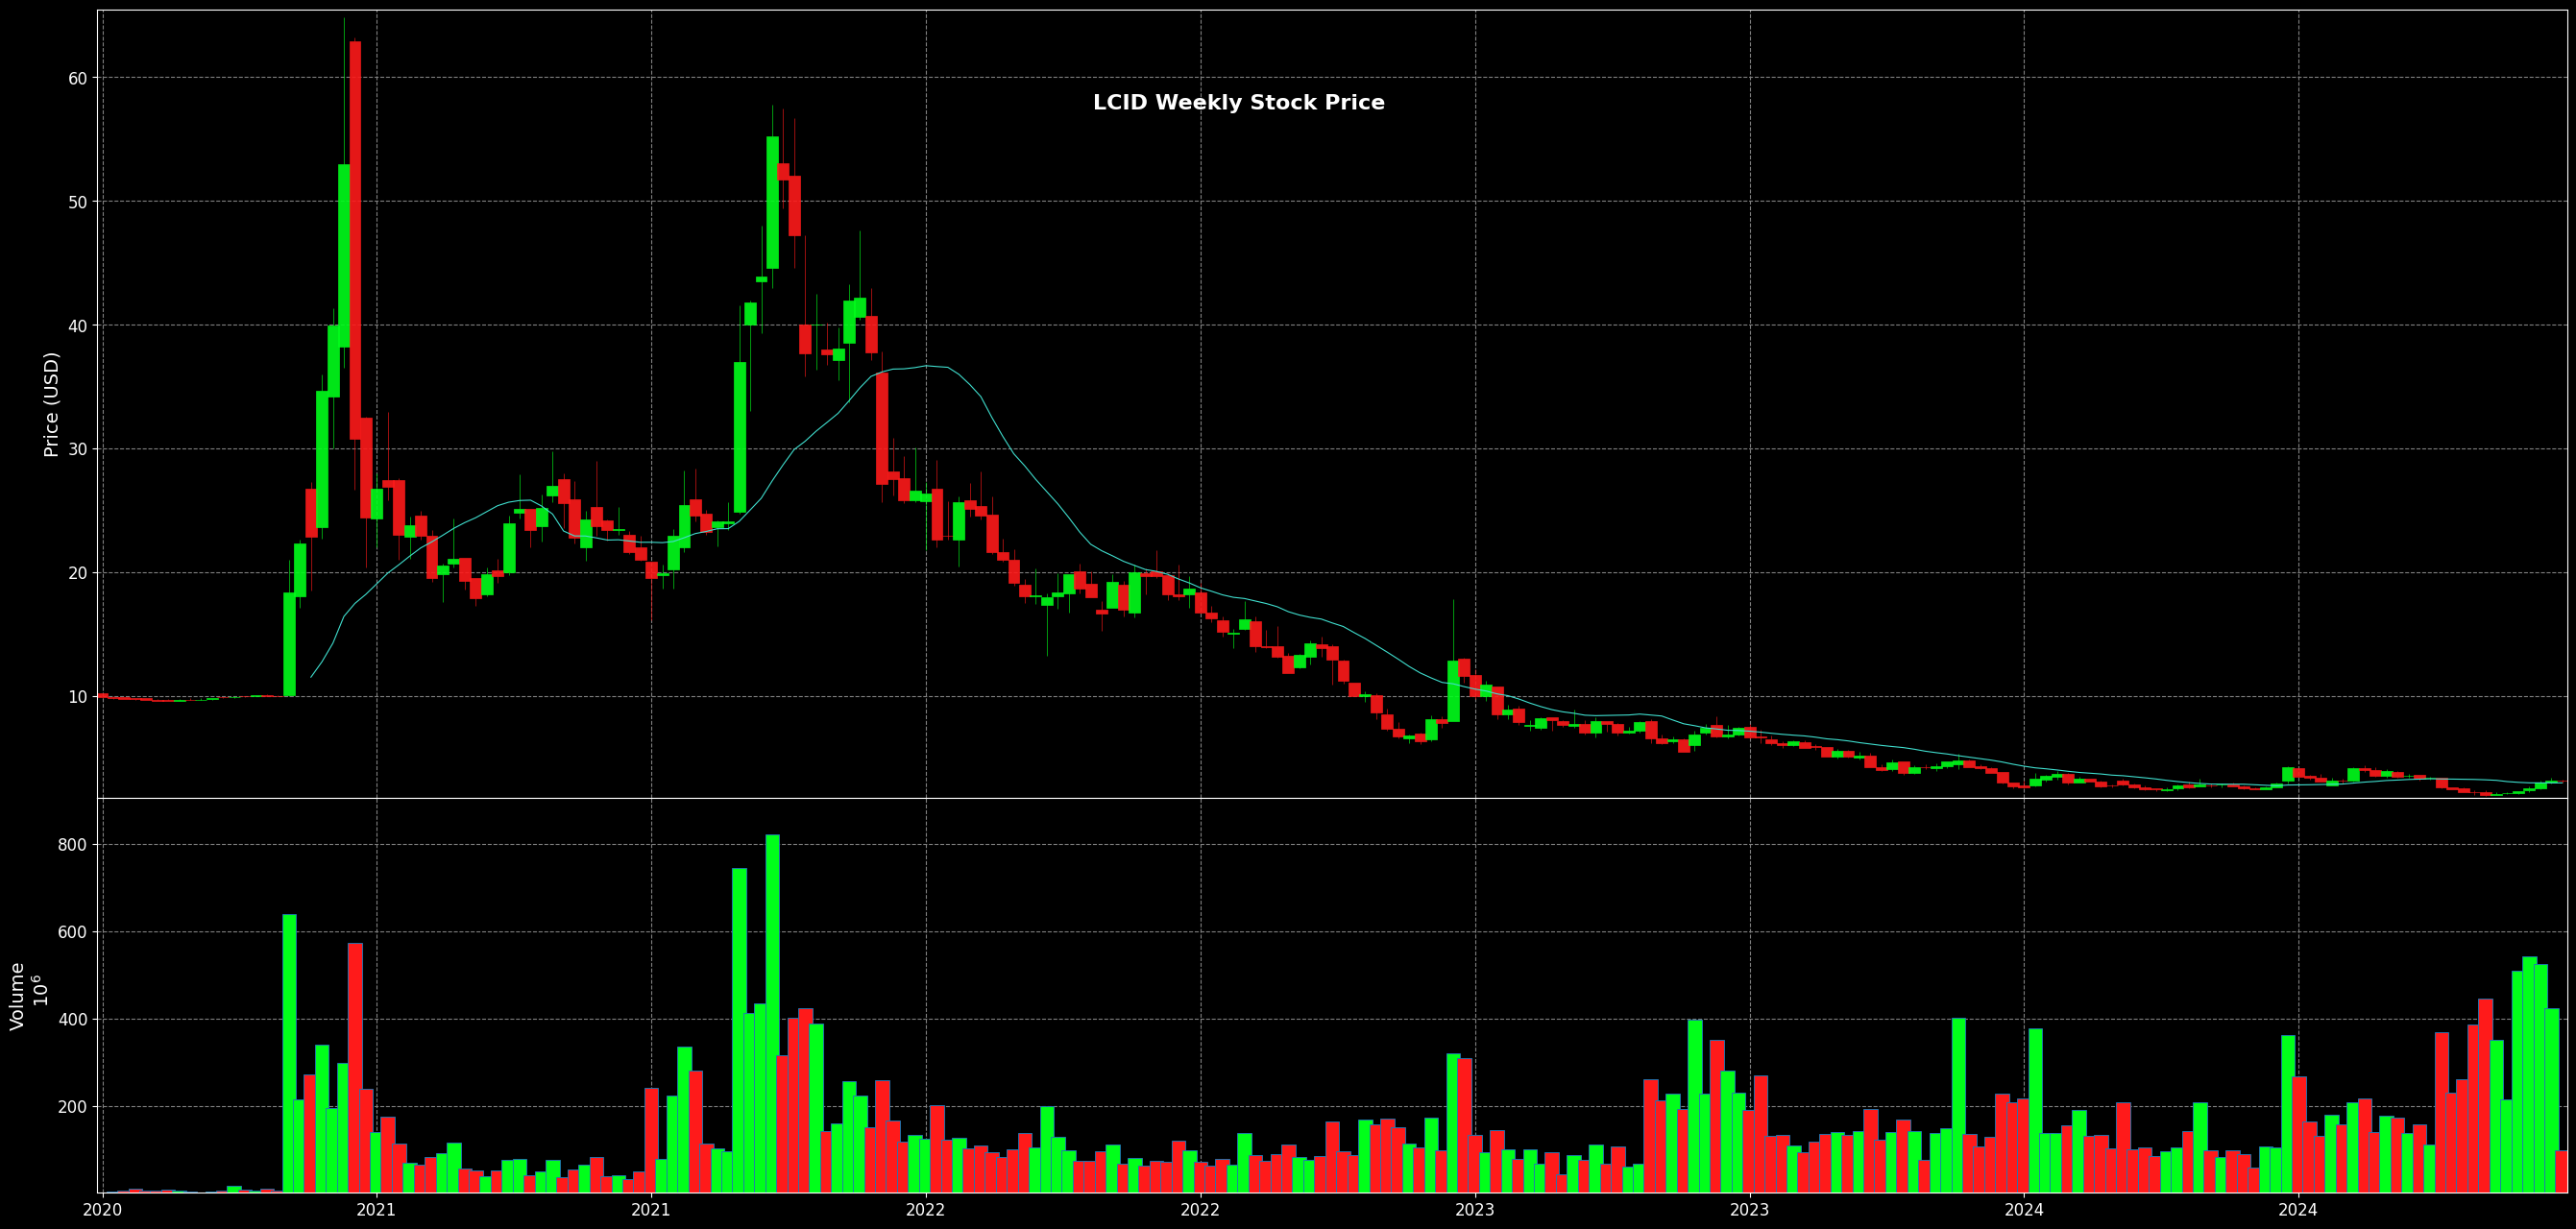

In [17]:
import mplfinance as mpf
import yfinance as yf
import pandas as pd

# Setup parameters
tickers = ['TSLA', 'BYDDF', 'RIVN', 'LCID']
start_date = '2020-01-01'
end_date = '2024-12-31'

# Dark theme with enhanced heading visibility
mc = mpf.make_marketcolors(
    up='#00ff1a',      # Bright green
    down='#ff1a1a',    # Bright red
    edge='inherit',
    wick='inherit',
    volume='in',
    ohlc='inherit'
)

s = mpf.make_mpf_style(
    base_mpf_style='nightclouds',  # Dark base style
    marketcolors=mc,
    gridstyle='--',
    y_on_right=False,
    facecolor='black',
    edgecolor='white',
    figcolor='black',
    gridcolor='gray',
    rc={
        'figure.facecolor': 'black',
        'axes.facecolor': 'black',
        'axes.edgecolor': 'white',
        'axes.labelcolor': 'white',
        'axes.titlecolor': 'white',
        'xtick.color': 'white',
        'ytick.color': 'white',
        'text.color': 'white',      # Set text color to white
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'figure.titlesize': 16,
        'figure.titleweight': 'bold'
    }
)

# Process each stock individually
for ticker in tickers:
    # Download and process data
    data = yf.download(ticker, start=start_date, end=end_date)
    
    if isinstance(data.columns, pd.MultiIndex):
        columns = data.columns.get_level_values(0).unique()
    else:
        columns = data.columns
    
    # Weekly aggregation
    weekly_data = pd.DataFrame()
    weekly_data['Open'] = data['Open'].resample('W').first()
    weekly_data['High'] = data['High'].resample('W').max()
    weekly_data['Low'] = data['Low'].resample('W').min()
    weekly_data['Close'] = data['Close'].resample('W').last()
    weekly_data['Volume'] = data['Volume'].resample('W').sum()
    weekly_data = weekly_data.dropna()
    
    # Enhanced dark theme plot with visible headings
    mpf.plot(
        weekly_data,
        type='candle',
        style=s,
        title=f'\n{ticker} Weekly Stock Price',
        ylabel='Price (USD)',
        ylabel_lower='Volume',
        volume=True,
        mav=(20),
        xrotation=0,
        datetime_format='%Y',
        figratio=(24,12),
        figscale=2.5,
        scale_width_adjustment=dict(candle=2.5, lines=1.0, volume=1.5),
        scale_padding=dict(left=0.8, right=0.8, top=1.2, bottom=1.0),
        panel_ratios=(2,1),
        tight_layout=True
    )

4) Take the Close of your stock, calculate its mean, variance, skewness and kurtosis, and plot the nonparametric kernel density of the Adjusted Close.

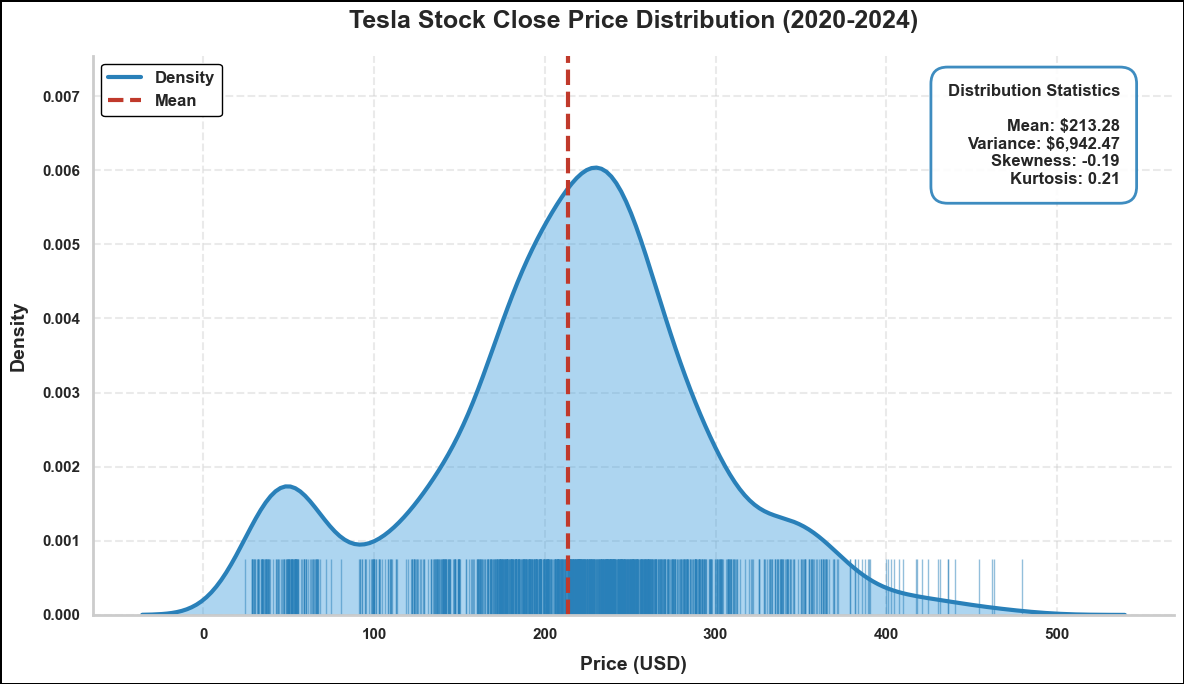

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Style setup
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# Get Close prices from multi-index
close_prices = tesla['Close']

# Calculate statistics
close_mean = close_prices.mean()
close_var = close_prices.var()
close_skew = stats.skew(close_prices)
close_kurt = stats.kurtosis(close_prices)

# Create figure with border
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor('black')

# Enhanced KDE plot
sns.kdeplot(data=close_prices, 
            color='#2980b9', 
            linewidth=3,
            label='Density')
sns.kdeplot(data=close_prices, 
            color='#3498db', 
            alpha=0.4,
            fill=True)
sns.rugplot(data=close_prices, 
            color='#2980b9', 
            alpha=0.5,
            height=0.1)

# Bold mean line
plt.axvline(close_mean, 
            color='#c0392b', 
            linestyle='--', 
            linewidth=3,
            label='Mean')

# Enhanced statistics box
stats_text = f'Distribution Statistics\n\n' \
             f'Mean: ${close_mean:,.2f}\n' \
             f'Variance: ${close_var:,.2f}\n' \
             f'Skewness: {close_skew:.2f}\n' \
             f'Kurtosis: {close_kurt:.2f}'

plt.text(0.95, 0.95, stats_text,
         transform=ax.transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(facecolor='white',
                  alpha=0.9,
                  edgecolor='#2980b9',
                  linewidth=2,
                  boxstyle='round,pad=1'),
         fontweight='bold')

# Enhanced title and labels
plt.title('Tesla Stock Close Price Distribution (2020-2024)',
          fontsize=18,
          pad=20)
plt.xlabel('Price (USD)',
          fontsize=14,
          labelpad=10)
plt.ylabel('Density',
          fontsize=14,
          labelpad=10)

# Enhanced grid and spines
ax.grid(True, alpha=0.4, linestyle='--', linewidth=1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

# Fixed legend parameters
plt.legend(frameon=True,
          facecolor='white',
          framealpha=1,
          edgecolor='black',
          fontsize=12)

plt.tight_layout()
plt.show()

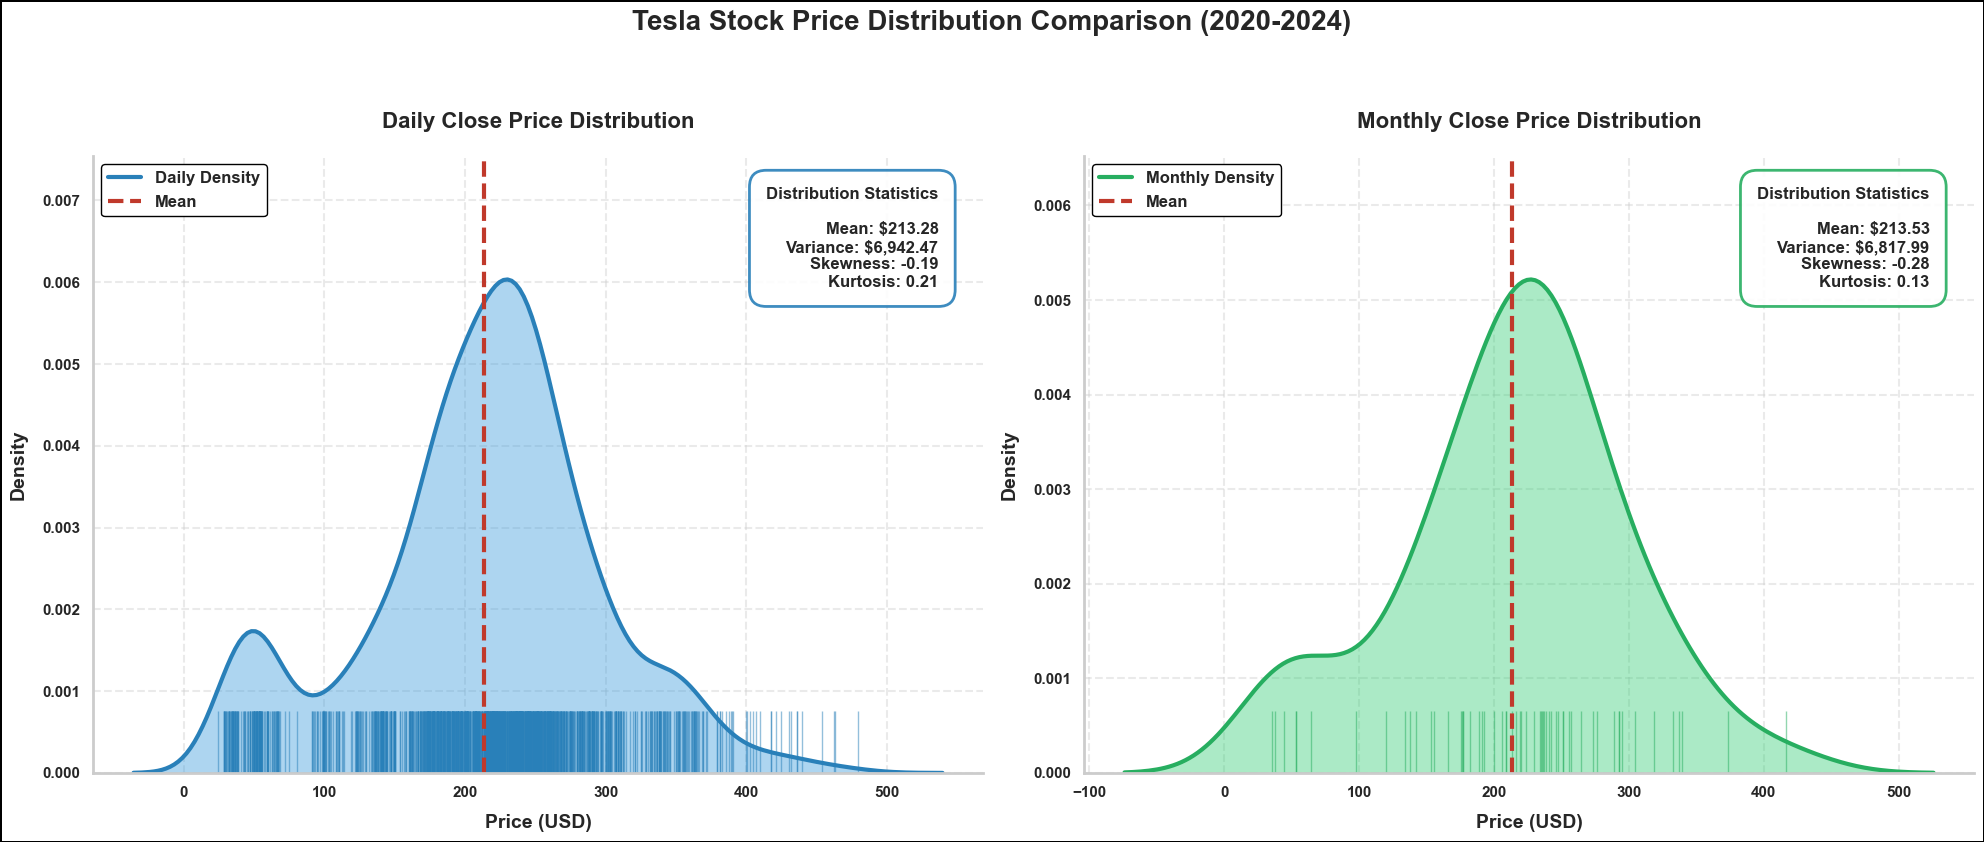

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Style setup
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.patch.set_linewidth(2)
fig.patch.set_edgecolor('black')

# Daily Prices (Left Plot)
daily_mean = tesla['Close'].mean()
daily_var = tesla['Close'].var()
daily_skew = stats.skew(tesla['Close'])
daily_kurt = stats.kurtosis(tesla['Close'])

sns.kdeplot(data=tesla['Close'], ax=ax1, color='#2980b9', linewidth=3, label='Daily Density')
sns.kdeplot(data=tesla['Close'], ax=ax1, color='#3498db', alpha=0.4, fill=True)
sns.rugplot(data=tesla['Close'], ax=ax1, color='#2980b9', alpha=0.5, height=0.1)
ax1.axvline(daily_mean, color='#c0392b', linestyle='--', linewidth=3, label='Mean')

# Monthly Prices (Right Plot)
monthly_data = tesla.resample('M')['Close'].mean()
monthly_mean = monthly_data.mean()
monthly_var = monthly_data.var()
monthly_skew = stats.skew(monthly_data)
monthly_kurt = stats.kurtosis(monthly_data)

sns.kdeplot(data=monthly_data, ax=ax2, color='#27ae60', linewidth=3, label='Monthly Density')
sns.kdeplot(data=monthly_data, ax=ax2, color='#2ecc71', alpha=0.4, fill=True)
sns.rugplot(data=monthly_data, ax=ax2, color='#27ae60', alpha=0.5, height=0.1)
ax2.axvline(monthly_mean, color='#c0392b', linestyle='--', linewidth=3, label='Mean')

# Format both plots
for ax, title, stats_values, color in zip(
    [ax1, ax2], 
    ['Daily Close Price Distribution', 'Monthly Close Price Distribution'],
    [(daily_mean, daily_var, daily_skew, daily_kurt), 
     (monthly_mean, monthly_var, monthly_skew, monthly_kurt)],
    ['#2980b9', '#27ae60']):
    
    mean, var, skew, kurt = stats_values
    stats_text = f'Distribution Statistics\n\n' \
                 f'Mean: ${mean:,.2f}\n' \
                 f'Variance: ${var:,.2f}\n' \
                 f'Skewness: {skew:.2f}\n' \
                 f'Kurtosis: {kurt:.2f}'
    
    ax.text(0.95, 0.95, stats_text,
            transform=ax.transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(facecolor='white',
                     alpha=0.9,
                     edgecolor=color,
                     linewidth=2,
                     boxstyle='round,pad=1'),
            fontweight='bold',
            fontsize=12)
    
    ax.set_title(title, fontsize=16, pad=20)
    ax.set_xlabel('Price (USD)', fontsize=14, labelpad=10)
    ax.set_ylabel('Density', fontsize=14, labelpad=10)
    ax.grid(True, alpha=0.4, linestyle='--', linewidth=1.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.legend(frameon=True,
             facecolor='white',
             framealpha=1,
             edgecolor='black',
             fontsize=12)

plt.suptitle('Tesla Stock Price Distribution Comparison (2020-2024)', 
            fontsize=20, y=1.05, fontweight='bold')
plt.tight_layout()
plt.show()

5) Take "Close" column as your target and replicate (1) the mixture modeling technique to approximate the empirical distribution using normal distributions as component distribution, (2) bootstrap analysis to find the 95% confidence interval of the mean estimates (3) Monte-Carlo analysis to simulate 1000 paths using five key parameters that mimic the empirical distribution of your stock.    

[*********************100%***********************]  1 of 1 completed

sample mean: $213.2794425815652
sample standard deviation: $83.28836563497813


<Figure size 1400x800 with 0 Axes>

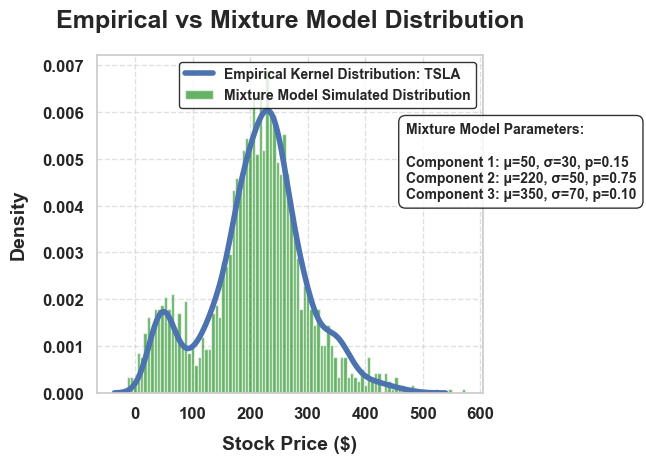

In [21]:
#1. the mixture modeling technique to approximate the empirical distribution using normal distributions as component distribution,
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import yfinance as yf

start_date = datetime(2020,1,1)
end_date = datetime(2024,12,31)

stock_symbol = "TSLA"
stocks = yf.download(stock_symbol,start_date ,end_date)
stocks['Close'].describe() # summary statistics
X = stocks['Close'].values
mu = np.mean(X)
se = np.std(X)
print(f"sample mean: ${mu}")
print(f"sample standard deviation: ${se}")

# Given parameters
mu_1 = 50
sigma1 = 30
mu_2 = 220
sigma2 =50
mu_3 = 350
sigma3 =70
p1 = 0.15
p2 = 0.75
p3 = 1-(p1+p2)

T = 2000

# Generate the data for r
r = np.zeros(T)
for t in range(T):
    r1 = mu_1 + sigma1 * np.random.normal(0,1,1)
    r2 = mu_2 + sigma2 * np.random.normal(0,1,1)
    r3 = mu_3 + sigma3 * np.random.normal(0,1,1)
    u = np.random.uniform(0,1,1)
    r[t] = r1 * (u <= p1)+ r2 * (u > p1)*(u <= p1 + p2) \
        + r3 * (u > p1 + p2 )*(u <= p1 + p2 + p3) 
# Style setup
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

# Plotting the histogram of r
plt.figure(figsize=(14, 8))  # Larger figure for better spacing
fig, ax = plt.subplots()
sns.kdeplot(data=X, linewidth=4, color="blue", label=f'Empirical Kernel Distribution: {stock_symbol}')  # Blue KDE line
plt.hist(r, bins=100, density=True, alpha=0.6, color='green', label="Mixture Model Simulated Distribution")  # Green histogram

# Add title and labels
plt.title("Empirical vs Mixture Model Distribution", fontsize=18, pad=20)
plt.xlabel("Stock Price ($)", fontsize=14, labelpad=10)
plt.ylabel("Density", fontsize=14, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend (inside the plot, bottom-right corner)
plt.legend(loc='upper right', fontsize=10, frameon=True, facecolor='white', edgecolor='black')

# Text box to display parameters (mu, sigma, p)
param_text = f"Mixture Model Parameters:\n\n" \
             f"Component 1: μ={mu_1}, σ={sigma1}, p={p1:.2f}\n" \
             f"Component 2: μ={mu_2}, σ={sigma2}, p={p2:.2f}\n" \
             f"Component 3: μ={mu_3}, σ={sigma3}, p={p3:.2f}"

# Place the text box within the plot (top-right corner)
plt.text(0.8, 0.8, param_text, 
         transform=ax.transAxes, 
         verticalalignment='top', 
         horizontalalignment='left', 
         fontsize=10, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.8))

# Grid and layout adjustments
plt.grid(True, linestyle="--", alpha=0.6, linewidth=1)
plt.tight_layout()
plt.show()



[*********************100%***********************]  1 of 1 completed


Sample Mean: $213.28
Sample Standard Deviation: $83.29
Confidence interval of mu_mc: 202.72401045676222 212.59377172735321


<Figure size 1400x800 with 0 Axes>

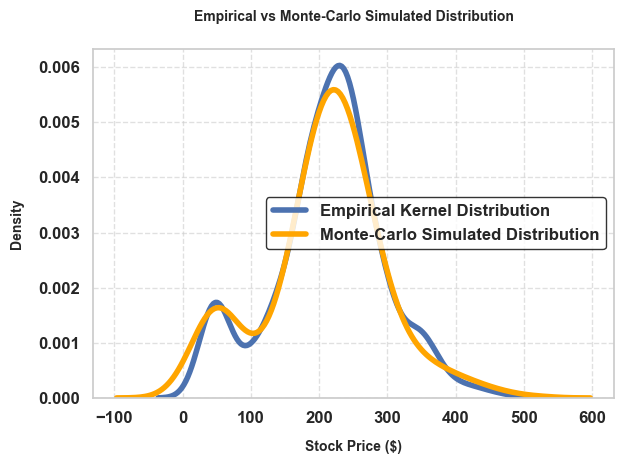

In [22]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas_datareader import DataReader
from datetime import datetime
import yfinance as yf

# Data setup
start_date = datetime(2020, 1, 1)
end_date = datetime(2024, 12, 31)
stock_symbol = "TSLA"
stocks = yf.download(stock_symbol, start=start_date, end=end_date)
X = stocks['Close'].values
T = len(X)  # Number of trading days
mu = np.mean(X)
se = np.std(X)

print(f"Sample Mean: ${mu:.2f}")
print(f"Sample Standard Deviation: ${se:.2f}")

# Mixture model parameters
mu_1 = 50
sigma1 = 30
mu_2 = 220
sigma2 =50
mu_3 = 350
sigma3 =70
p1 = 0.15
p2 = 0.75
p3 = 1-(p1+p2)

# Function to generate empirical distribution
def generateEmpiricalDist(mu_1, sigma1, mu_2, sigma2, mu_3, sigma3, p1, p2, p3, T):
    simulatedPrice = np.zeros(T - 1)
    for t in range(0, T - 1):
        r1 = mu_1 + sigma1 * np.random.normal(0, 1, 1)
        r2 = mu_2 + sigma2 * np.random.normal(0, 1, 1)
        r3 = mu_3 + sigma3 * np.random.normal(0, 1, 1)
        u = np.random.uniform(0, 1, 1)
        simulatedPrice[t] = (
            r1 * (u <= p1) +
            r2 * ((u > p1) & (u <= p1 + p2)) +
            r3 * ((u > p1 + p2) & (u <= p1 + p2 + p3))
        )
    return simulatedPrice

# Monte Carlo Simulation
T = X.shape[0]
M = 1000
mu_mc = np.zeros(M)
y_mc = 0
for i in range(0, M):
    simulatedPrice = generateEmpiricalDist(mu_1, sigma1, mu_2, sigma2, mu_3, sigma3, p1, p2, p3, T)
    mu_mc[i] = np.mean(simulatedPrice)
    y_mc += np.sort(simulatedPrice)

y_mc = y_mc / M
mu_mc = np.sort(mu_mc)

print("Confidence interval of mu_mc:", mu_mc[25], mu_mc[975])

# Enhanced Visualization
plt.style.use('default')
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

plt.figure(figsize=(14, 8))  # Larger figure for better spacing
fig, ax = plt.subplots()

# KDE plots
sns.kdeplot(data=X, color="blue", linewidth=4, label="Empirical Kernel Distribution")  # Blue KDE line
sns.kdeplot(data=y_mc, color="orange", linewidth=4, label="Monte-Carlo Simulated Distribution")  # Orange KDE line

# Title, labels, and legend
plt.title("Empirical vs Monte-Carlo Simulated Distribution", fontsize=10, pad=20)
plt.xlabel("Stock Price ($)", fontsize=10, labelpad=10)
plt.ylabel("Density", fontsize=10, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, frameon=True, facecolor='white', edgecolor='black')

# Gridlines
plt.grid(True, linestyle="--", alpha=0.6, linewidth=1)

# Tight layout
plt.tight_layout()
plt.show()


In [23]:
"Bootstrap"
T= X.shape[0]
B = 1000
mu_boot = np.zeros(B)
se_boot = np.zeros(B)
x_boot_std = np.zeros(B)
for i in range(0, B):
     x_boot = X[np.random.choice(T,T)]
     mu_boot[i] = np.mean(x_boot)
     se_boot[i] = np.std(x_boot)/np.sqrt(T) # std of mu_boot
     x_boot_std[i] = np.std(x_boot) # std of x_boot
     # CLT: std(x_boost) = sqrt(T)*std(mu_boot)
mu_boot = np.sort(mu_boot)
se_boot = np.sort(se_boot)
xboot_std = np.sort(x_boot_std)
print("Statistics about the Mean")
print("95% confidence interval of mu_boot:", mu_boot[25], mu_boot[975])
print("95% confidence interval of std_boot of mu :", se_boot[25], se_boot[975])
print("\n")
print("Statistics about the Sample")
print(f"95% confidence interval of {stock_symbol} stock price std (method 1):", se_boot[25]*np.sqrt(T), se_boot[975]*np.sqrt(T))
print(f"95% confidence interval of {stock_symbol} stock price std (method 2):", xboot_std[25], xboot_std[975])

Statistics about the Mean
95% confidence interval of mu_boot: 208.85162922230236 217.917135539089
95% confidence interval of std_boot of mu : 2.2492219506348627 2.445148878569006


Statistics about the Sample
95% confidence interval of TSLA stock price std (method 1): 79.7443554410257 86.69078710697957
95% confidence interval of TSLA stock price std (method 2): 79.7443554410257 86.69078710697957


Statistics about the Mean
95% confidence interval of mu_boot: 209.10, 217.50
95% confidence interval of std_boot of mu: 2.25, 2.44


Statistics about the Sample
95% confidence interval of TSLA stock price std (method 1): 79.70, 86.48
95% confidence interval of TSLA stock price std (method 2): 79.70, 86.48


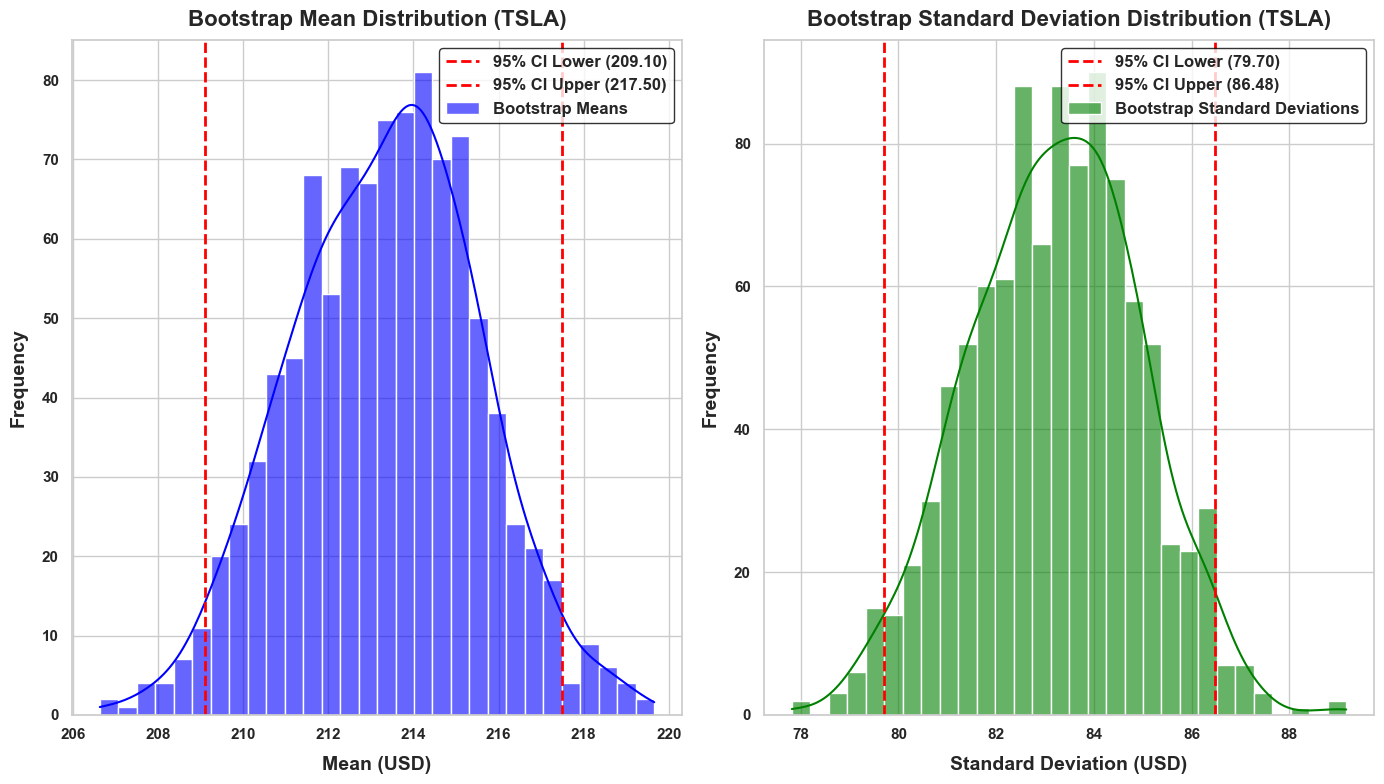

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bootstrap analysis
T = X.shape[0]
B = 1000  # Number of bootstrap samples
mu_boot = np.zeros(B)
se_boot = np.zeros(B)
x_boot_std = np.zeros(B)

for i in range(B):
    x_boot = X[np.random.choice(T, T)]  # Resample with replacement
    mu_boot[i] = np.mean(x_boot)  # Bootstrap mean
    se_boot[i] = np.std(x_boot) / np.sqrt(T)  # Bootstrap standard error
    x_boot_std[i] = np.std(x_boot)  # Bootstrap standard deviation

# Sort results for confidence interval calculation
mu_boot = np.sort(mu_boot)
se_boot = np.sort(se_boot)
x_boot_std = np.sort(x_boot_std)

# Confidence intervals
mu_ci = (mu_boot[25], mu_boot[975])  # 95% CI for mean
se_ci = (se_boot[25], se_boot[975])  # 95% CI for standard error
std_ci = (x_boot_std[25], x_boot_std[975])  # 95% CI for standard deviation

print("Statistics about the Mean")
print(f"95% confidence interval of mu_boot: {mu_ci[0]:.2f}, {mu_ci[1]:.2f}")
print(f"95% confidence interval of std_boot of mu: {se_ci[0]:.2f}, {se_ci[1]:.2f}")
print("\n")
print("Statistics about the Sample")
print(f"95% confidence interval of {stock_symbol} stock price std (method 1): {se_ci[0] * np.sqrt(T):.2f}, {se_ci[1] * np.sqrt(T):.2f}")
print(f"95% confidence interval of {stock_symbol} stock price std (method 2): {std_ci[0]:.2f}, {std_ci[1]:.2f}")

# Visualization
plt.figure(figsize=(14, 8))

# Plot for Bootstrap Means
plt.subplot(1, 2, 1)
sns.histplot(mu_boot, kde=True, bins=30, color='blue', alpha=0.6, label='Bootstrap Means')
plt.axvline(mu_ci[0], color='red', linestyle='--', linewidth=2, label=f'95% CI Lower ({mu_ci[0]:.2f})')
plt.axvline(mu_ci[1], color='red', linestyle='--', linewidth=2, label=f'95% CI Upper ({mu_ci[1]:.2f})')
plt.title(f"Bootstrap Mean Distribution ({stock_symbol})", fontsize=16, pad=10)
plt.xlabel("Mean (USD)", fontsize=14, labelpad=10)
plt.ylabel("Frequency", fontsize=14, labelpad=10)
plt.legend(fontsize=12, frameon=True, edgecolor='black')

# Plot for Bootstrap Standard Deviations
plt.subplot(1, 2, 2)
sns.histplot(x_boot_std, kde=True, bins=30, color='green', alpha=0.6, label='Bootstrap Standard Deviations')
plt.axvline(std_ci[0], color='red', linestyle='--', linewidth=2, label=f'95% CI Lower ({std_ci[0]:.2f})')
plt.axvline(std_ci[1], color='red', linestyle='--', linewidth=2, label=f'95% CI Upper ({std_ci[1]:.2f})')
plt.title(f"Bootstrap Standard Deviation Distribution ({stock_symbol})", fontsize=16, pad=10)
plt.xlabel("Standard Deviation (USD)", fontsize=14, labelpad=10)
plt.ylabel("Frequency", fontsize=14, labelpad=10)
plt.legend(fontsize=12, frameon=True, edgecolor='black')

# Layout adjustment
plt.tight_layout()
plt.show()
